In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv("C:/Users/Dell/Downloads/List of Countries by Sugarcane Production.csv")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [6]:
df.shape

(103, 7)

## Data Cleaning

In [7]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348448000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123059739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87468496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65450704,324219,1.130.820,57.879


In [9]:
df.rename(columns={"Production (Tons)": "Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare":"Yield(Kg/Hectare"},inplace=True)

In [10]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348448000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123059739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87468496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65450704,324219,1.130.820,57.879


In [11]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield (Kg / Hectare)         1
dtype: int64

In [12]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [13]:
df=df.dropna().reset_index()

In [14]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348448000,260721,4.950.000,"70.393,5"
2,China,Asia,123059739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87468496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65450704,324219,1.130.820,57.879


In [16]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield (Kg / Hectare)         object
dtype: object

In [17]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(str).str.replace(',', '').astype(float)
# df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(str).str.replace(',', '').astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(str).str.replace(',', '').astype(float)


In [18]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)              object
Yield (Kg / Hectare)         float64
dtype: object

In [19]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             102
Yield (Kg / Hectare)         102
dtype: int64

## Univariate Analysis

In [20]:
# How many countries produce sugarcane from each continent
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

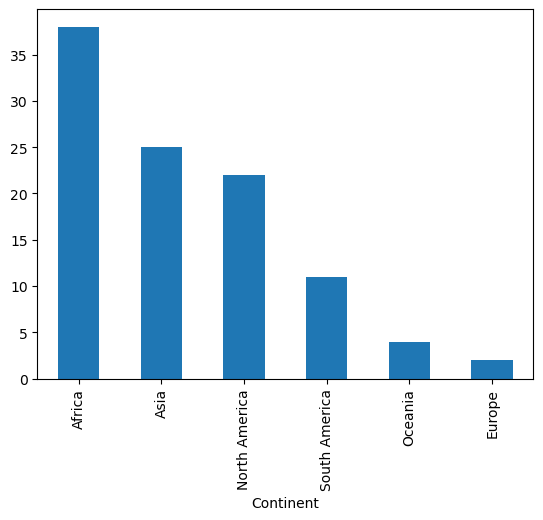

In [21]:
df["Continent"].value_counts().plot(kind="bar")

C:\Users\Dell\AppData\Local\Temp\ipykernel_14020\3007187210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])


<Axes: >

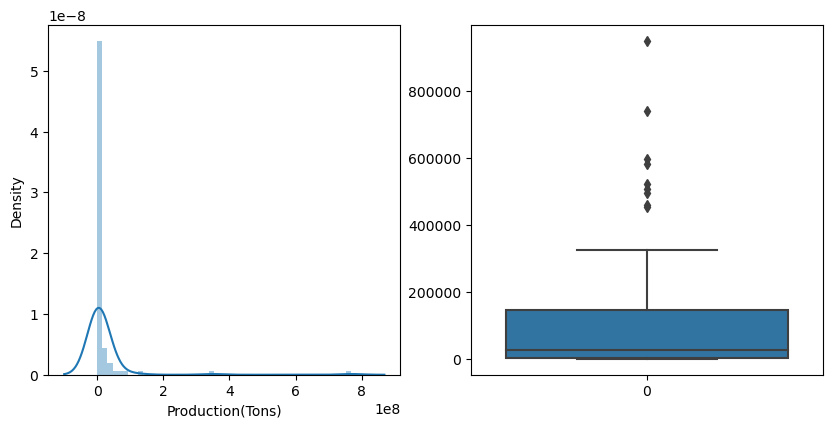

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])



In [23]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,102.000000
mean,1.850372e+07,112652.907671,56.190931
std,8.419149e+07,176841.911118,27.569322
min,1.000000e+00,0.000000,5.577800
25%,6.251875e+04,1304.000000,36.809325
50%,1.440044e+06,25572.500000,55.679950
75%,6.426824e+06,146384.750000,73.706675
max,7.686784e+08,951087.000000,129.049300


## Bivariate Analysis
Which country produces maximum sugarcane?

In [24]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [25]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [26]:
df_new["Production(Tons)_percent"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [27]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

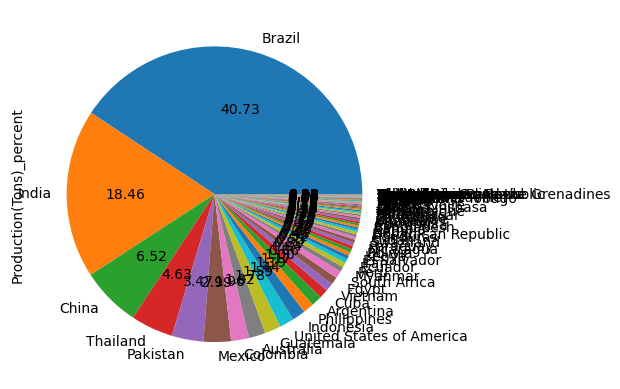

In [28]:
df_new["Production(Tons)_percent"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

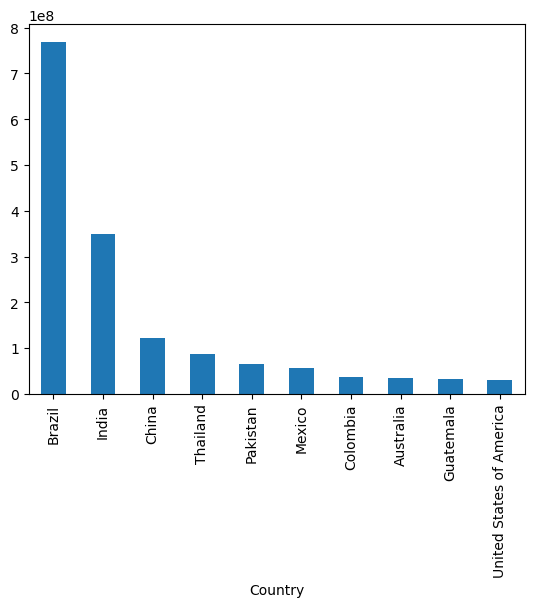

In [29]:
df_new["Production(Tons)"].head(10).plot(kind="bar")

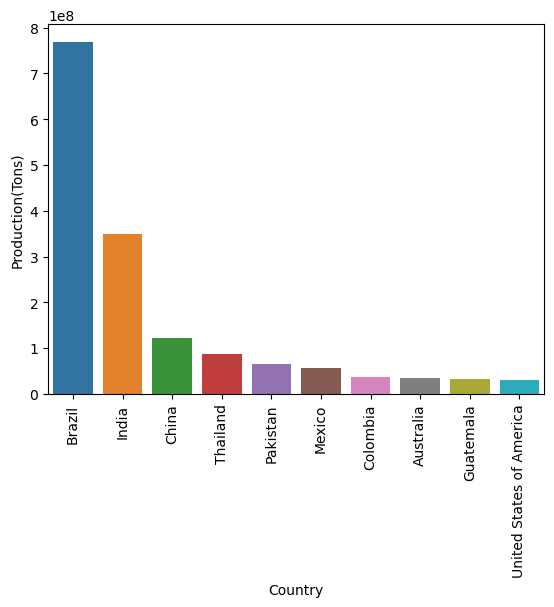

In [30]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which Country has the highest production

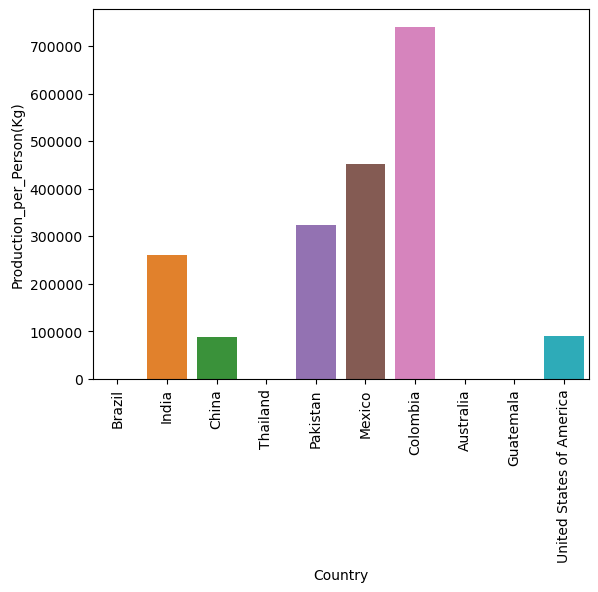

In [31]:
df_production=df.sort_values("Production_per_Person(Kg)",ascending=False)
ax=sns.barplot(data=df.head(10),x="Country",y="Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [32]:
df_production.head(10)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
25,Paraguay,South America,6708000.0,951087.0,120,55.9000
6,Colombia,South America,36951213.0,740075.0,416.626,88.6915
55,Trinidad and Tobago,North America,810.0,597066.0,15,54.0000
42,Panama,North America,2419638.0,581814.0,37.995,63.6831
51,Jamaica,North America,1422432.0,521254.0,26.255,54.1782
19,Ecuador,South America,8661609.0,507518.0,104.661,82.7584
12,Argentina,South America,21990823.0,494237.0,331.699,66.2975
29,Dominican Republic,North America,4717490.0,459519.0,106.81,44.1670
5,Mexico,North America,56446821.0,452524.0,781.054,72.2700
4,Pakistan,Asia,65450704.0,324219.0,1.130.820,57.8790


## Correlation

In [33]:
df.corr()

ValueError: could not convert string to float: 'Brazil'

In [ ]:
sns.heatmap(df.corr(),annot=True)

## DO countries with highest land produce more sugarcane?

In [ ]:
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

## Do countries which yeild more sugarcane per hectare produces more sugarcane in total?


In [ ]:
sns.scatterplot(data=df,x="Yield (Kg / Hectare)",y="Production(Tons)")

## Analysis for Continent

In [34]:
df_continent=df.groupby("Continent").sum()

In [35]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2.324825e+06,137.011246.93786.87657.85169.56441.69551.47754...,2142.1075
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1.856506e+06,4.950.0001.675.2151.336.5751.130.820472.693410...,1226.8164
Europe,PortugalSpain,5823.0,5.360000e+02,629,131.8709
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3.784457e+06,781.054259.85370.53442.30779.10374.1364.666106...,1335.7274
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,2.546413e+04,447.20436.7056.9991,162.4191
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3.498809e+06,10.226.205416.626331.69987.696104.661152.30612...,732.5337


## Which continent produces maximum sugarcane?

In [37]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

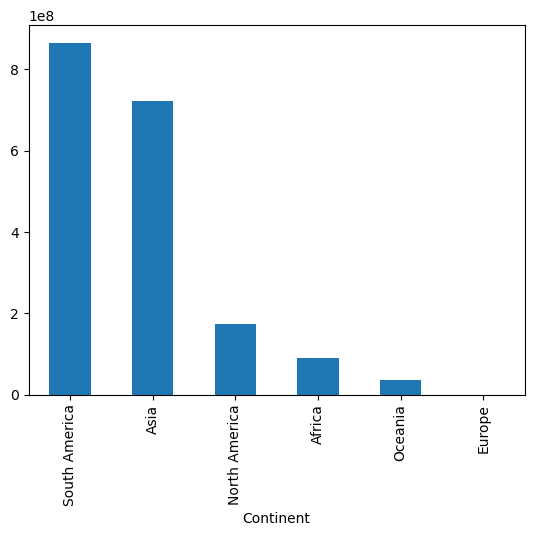

In [38]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

## Do number of countries in a Continent effects production of sugarcane?  

In [40]:
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]

In [41]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2.324825e+06,137.011246.93786.87657.85169.56441.69551.47754...,2142.1075,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1.856506e+06,4.950.0001.675.2151.336.5751.130.820472.693410...,1226.8164,25
Europe,PortugalSpain,5823.0,5.360000e+02,629,131.8709,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3.784457e+06,781.054259.85370.53442.30779.10374.1364.666106...,1335.7274,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,2.546413e+04,447.20436.7056.9991,162.4191,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3.498809e+06,10.226.205416.626331.69987.696104.661152.30612...,732.5337,11


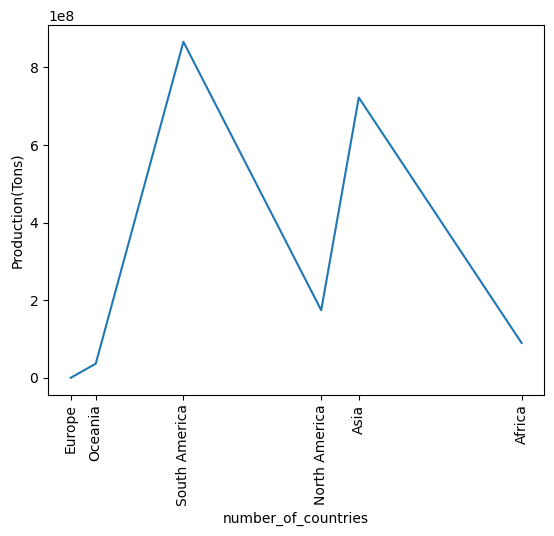

In [42]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="number_of_countries",y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"],continent_names,rotation=90)
plt.show()

## Production distribution by Continent

<Axes: ylabel='Production(Tons)'>

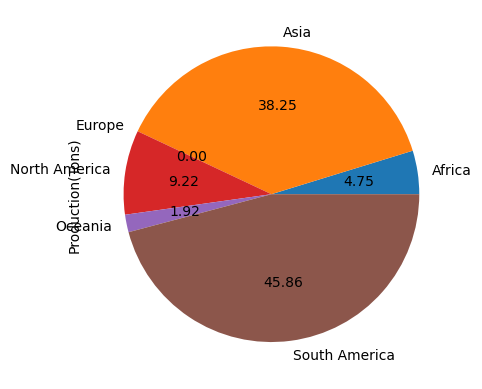

In [45]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")